[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/AnimalRacer3/CS370-Projects/Probability_Assignment.ipynb)

In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson

In [3]:
# Global Variables
  # Q1a
_min_gs = 5.5       # Smallest glove size
_max_gs = 9         # Largest glove size
_gs_step = 0.5      # Increments between glove sizes

  #Q1b
mean = np.zeros(3, int)                                                    # Def mean vector
cov_matrix = np.array([[1, 0.6, -0.9], [0.6, 1, -0.5], [-0.9, -0.5, 1]])   # Def covariance matrix
num_samples = 10000                                                        # Num of samples
fs = 24                                                                    # Font size
fig_size = (12,8)                                                          # Size of the graphs
labels = ["ak", "pp", "ptime"]                                             # labels used in graphs
  #Q1d
avg_num_ak = 5      # Average number of air knots per case
avg_num_pp = 15     # Average number of passing point per case
mean_pt = 120       # Mean number of practice time
sd_pt = 30          # Standard deviation of practice time
mean_gs = 7.25      # Mean glove size
sd_gs = 0.875       # Standard deviation of glove size

# **Problem 1 (80 points)**

A surgeon analyzes surgical videos and models events that occur. He describes the problem statement in [here](https://thomasward.com/simulating-correlated-data/). Your job is to replicate the solution in Python and demonstrate your understanding of the steps performed by including adequate explanation of the code in either markdown cells or inline to the code. You can insert as many markdown or code cells you need to perform the analysis.

**Question 1a (10 points)**

Write the code for generating the gs variable. This is the simplest random variable of the problem and can be generated independent of the others.

In [4]:
# Method for generating all glove sizes and easy to get a new glove size.
def Get_GS():
  inc = 0                                                                                     # Assumes that _min_gs is a whole number.
  if isinstance(_min_gs, float):                                                              # Checks to see if _min_gs is a float.
    inc = _min_gs - int(_min_gs)                                                              # If _min_gs is a float it sets the first inc to how far away _min_gs was from the lowest whole number.
  gs = (np.random.randint(_min_gs,_max_gs)+inc)+(np.random.randint(1/_gs_step)*_gs_step)      # Generates a random whole number between the min and max glove sizes then adds the increment if the min glove size is not a whole number after that it will add a random glove size step.
  return gs

In [5]:
# Runs Get_GS() to make sure it is possible to get all glove sizes then tests if it is possible to get a glove size out of range.
def Test_Get_GS():
  count = 0
  all_gs = np.arange(_min_gs, _max_gs+_gs_step, _gs_step)
  for target_gs in all_gs:
    test_gs = Get_GS()
    while target_gs != test_gs:
      if test_gs not in all_gs:
        raise ValueError("Glove size generated was not a valid Glove size: ", test_gs)
      test_gs = Get_GS()
      count = count + 1
      pass
    print("found: ", target_gs)

  print("\nTook ", count, " Iterations to get all possible glove sizes!")

**Question 1b (20 points)**

We have three variables, ak, pp, and ptime. Write the code for generating these variables from Multivate Gaussian distribution and replicate the associated plots.

In [6]:
# Here is the R translation for MVNormal function it takes (number of samples, mean, covariance matrix)
# You can also use np.random.multivariant_normal(Mean, Covariance Matrix, Number of samples)
def mvrnorm(n=1, mu=0, Sigma=None):
    nvars = Sigma.shape[0]
    # nvars x n matrix of Normal(0, 1)
    nmls = np.random.randn(nvars, n)
    # Scale and correlate Normal(0, 1), "nmls", to Normal(0, Sigma) by matrix mult with lower triangular of cholesky decomp of covariance matrix
    chol_decomp = np.linalg.cholesky(Sigma)
    scaled_correlated_nmls = np.dot(chol_decomp, nmls)
    # Shift to center around mus to get goal: Normal(mu, Sigma)
    samples = mu + scaled_correlated_nmls
    # Transpose so each variable is a column, not a row, to match what MASS::mvrnorm() returns
    return samples.T

numpy multivariate normal:
 [[ 1.          0.6048432  -0.90063772]
 [ 0.6048432   1.         -0.51155345]
 [-0.90063772 -0.51155345  1.        ]] 

mvrnorm:
 [[ 1.          0.59956907 -0.90293527]
 [ 0.59956907  1.         -0.50076513]
 [-0.90293527 -0.50076513  1.        ]] 



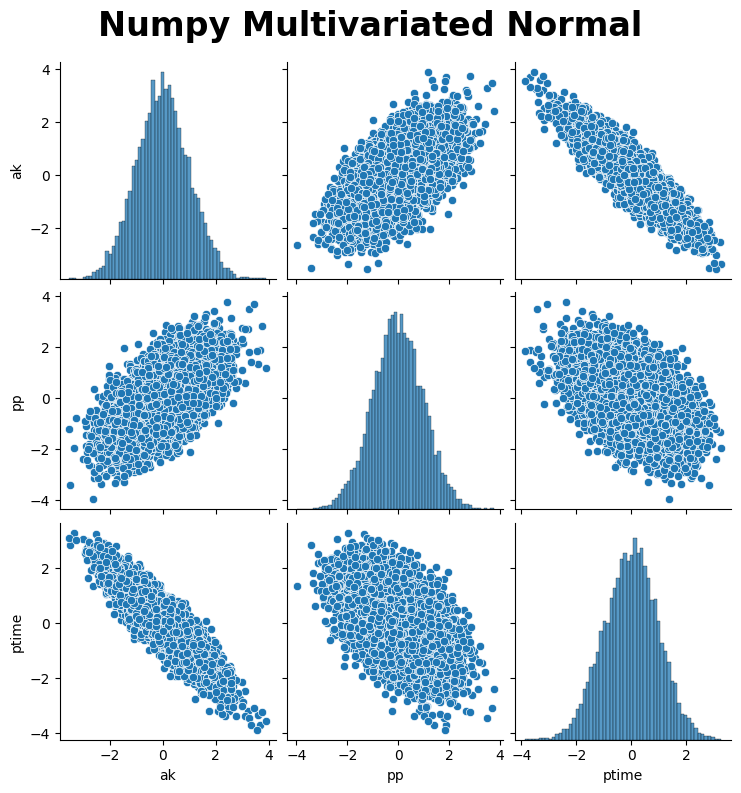

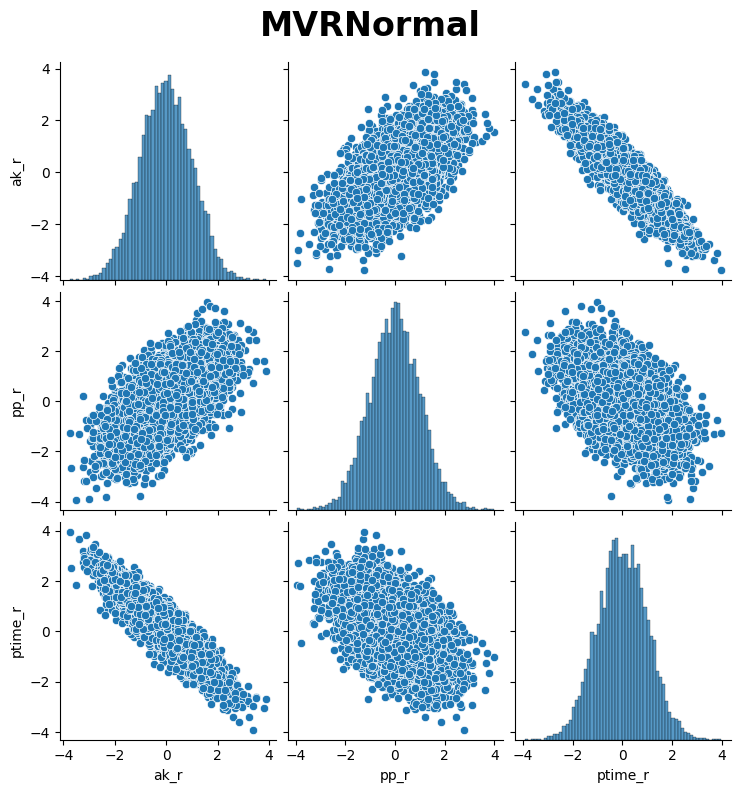

In [15]:
# sets the random seed using to ensure reproducibility
np.random.seed(1234)

# Creates a matrix of ak pp and ptime it is labeled A.P.T. as an abbreviation
apt = np.random.multivariate_normal(mean, cov_matrix, num_samples)

# This is using mvrnorm func we created instead of the numpy func
apt_r = mvrnorm(num_samples, Sigma = cov_matrix)

# Calculate the correlation matrix
corr_matrix = np.corrcoef(apt, rowvar=False)

# Calculate the correlation matrix for the mvrnorm func
corr_matrix_r = np.corrcoef(apt_r, rowvar=False)

print("numpy multivariate normal:\n", corr_matrix, "\n")
print("mvrnorm:\n", corr_matrix_r, "\n")

# Create a DataFrame with the variables
data = pd.DataFrame({'ak': apt[:,0], 'pp': apt[:,1], 'ptime': apt[:,2]})
data_r = pd.DataFrame({'ak_r': apt_r[:,0], 'pp_r': apt_r[:,1], 'ptime_r': apt_r[:,2]})

# Create a scatterplot matrix using seaborn
sns.pairplot(data).fig.suptitle("Numpy Multivariated Normal", fontsize=fs, fontweight="bold", y = 1.05)
sns.pairplot(data_r).fig.suptitle("MVRNormal", fontsize=fs, fontweight="bold", y = 1.05)
plt.show()

**Question 1c (20 points)**

Perform the probability inrtegral transform and replicate the associated plots.

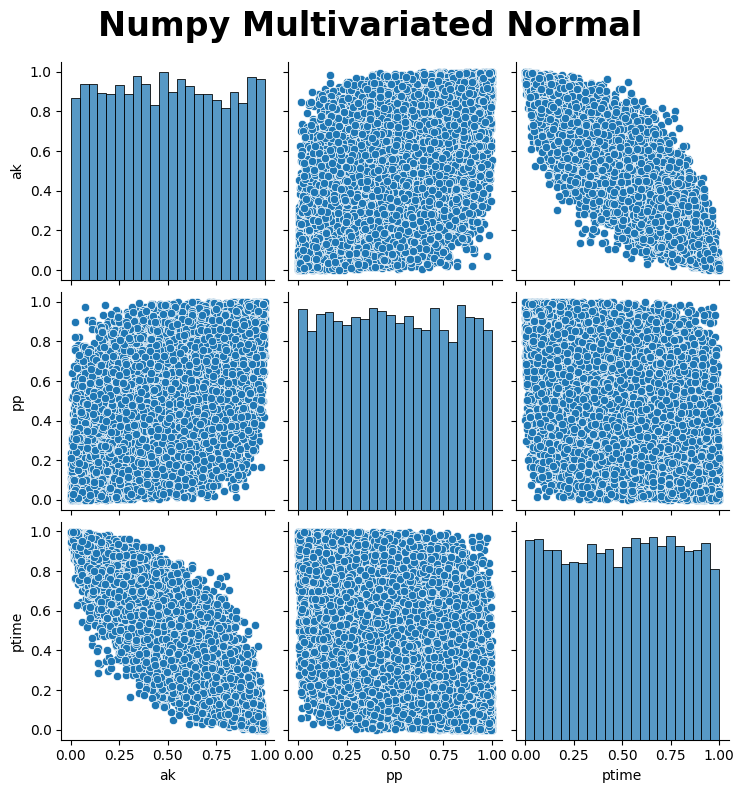

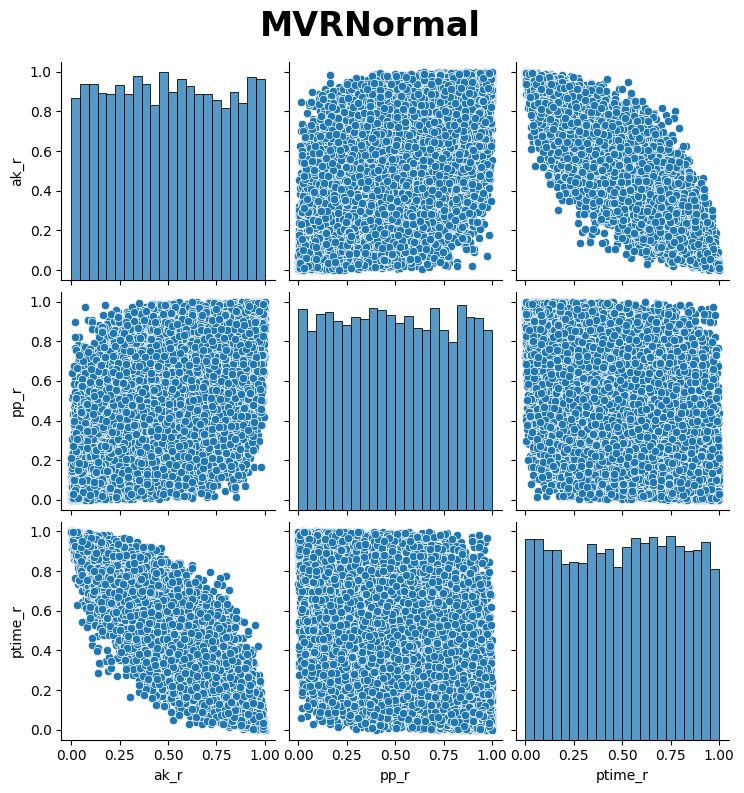

In [16]:
# Calculate the cumulative distribution function (CDF) of the normal distribution
# loc is pnorm equivalent to mean and scale is pnorms equivalent to sd
u = norm.cdf(apt, loc = 0, scale = 1)
u_r = norm.cdf(apt, loc = 0, scale = 1)

# Calculates the correlation matrix of u
corr_matrix_u = np.corrcoef(u, rowvar=False)
corr_matrix_u_r = np.corrcoef(u_r, rowvar=False)

# Create a DataFrame with the variables
data = pd.DataFrame({'ak': u[:,0], 'pp': u[:,1], 'ptime': u[:,2]})
data_r = pd.DataFrame({'ak_r': u_r[:,0], 'pp_r': u_r[:,1], 'ptime_r': u_r[:,2]})

# Create a scatterplot matrix using seaborn
sns.pairplot(data).fig.suptitle("Numpy Multivariated Normal", fontsize=fs, fontweight="bold", y = 1.05)
sns.pairplot(data_r).fig.suptitle("MVRNormal", fontsize=fs, fontweight="bold", y = 1.05)
plt.show()

**Question 1d (20 points)**

Perform the inverse transform sampling.

In [17]:
# Air knots poisson distribution
pd_ak = poisson.ppf(u[:, 0], mu = avg_num_ak)
pd_ak_r = poisson.ppf(u_r[:, 0], mu = avg_num_ak)

# Passes point poisson distribution
pd_pp = poisson.ppf(u[:, 1], mu = avg_num_pp)
pd_pp_r = poisson.ppf(u_r[:, 1], mu = avg_num_pp)

# Practice time normal distribution
nd_pt = norm.ppf(u[:, 2], loc=mean_pt, scale=sd_pt)
nd_pt_r = norm.ppf(u_r[:, 2], loc=mean_pt, scale=sd_pt)

# Glove size normalish distribution
gs = np.random.normal(loc=mean_gs, scale=sd_gs, size=num_samples)

# Define functions to calculate correlations
def calculate_correlation(x, y):
    return np.corrcoef(x, y)[0, 1]

# Calculate correlations
correlations = {
    "AK_PP": calculate_correlation(pd_ak, pd_pp),
    "AK_PP_r": calculate_correlation(pd_ak_r, pd_pp_r),
    "AK_PTime": calculate_correlation(pd_ak, nd_pt),
    "AK_PTime_r": calculate_correlation(pd_ak_r, nd_pt_r),
    "PP_PTime": calculate_correlation(pd_pp, nd_pt),
    "PP_PTime_r": calculate_correlation(pd_pp_r, nd_pt_r),
    "GS_AK": calculate_correlation(gs, pd_ak),
    "GS_AK_r": calculate_correlation(gs, pd_ak_r),
    "GS_PP": calculate_correlation(gs, pd_pp),
    "GS_PP_r": calculate_correlation(gs, pd_pp_r),
    "GS_PTime": calculate_correlation(gs, nd_pt),
    "GS_PTime_r": calculate_correlation(gs, nd_pt_r),
}

# Print correlations
for key, value in correlations.items():
    print(f"{key} correlation: {value}")

AK_PP correlation: 0.596653543585595
AK_PP_r correlation: 0.596653543585595
AK_PTime correlation: -0.8893928092846783
AK_PTime_r correlation: -0.8893928092846783
PP_PTime correlation: -0.5101952523479483
PP_PTime_r correlation: -0.5101952523479483
GS_AK correlation: 0.016928543457394404
GS_AK_r correlation: 0.016928543457394404
GS_PP correlation: 0.014217554149656881
GS_PP_r correlation: 0.014217554149656881
GS_PTime correlation: -0.021290118673226503
GS_PTime_r correlation: -0.021290118673226503


**Question 1e (10 points)**

Replicate the final plot showcasing the correlations between the variables.

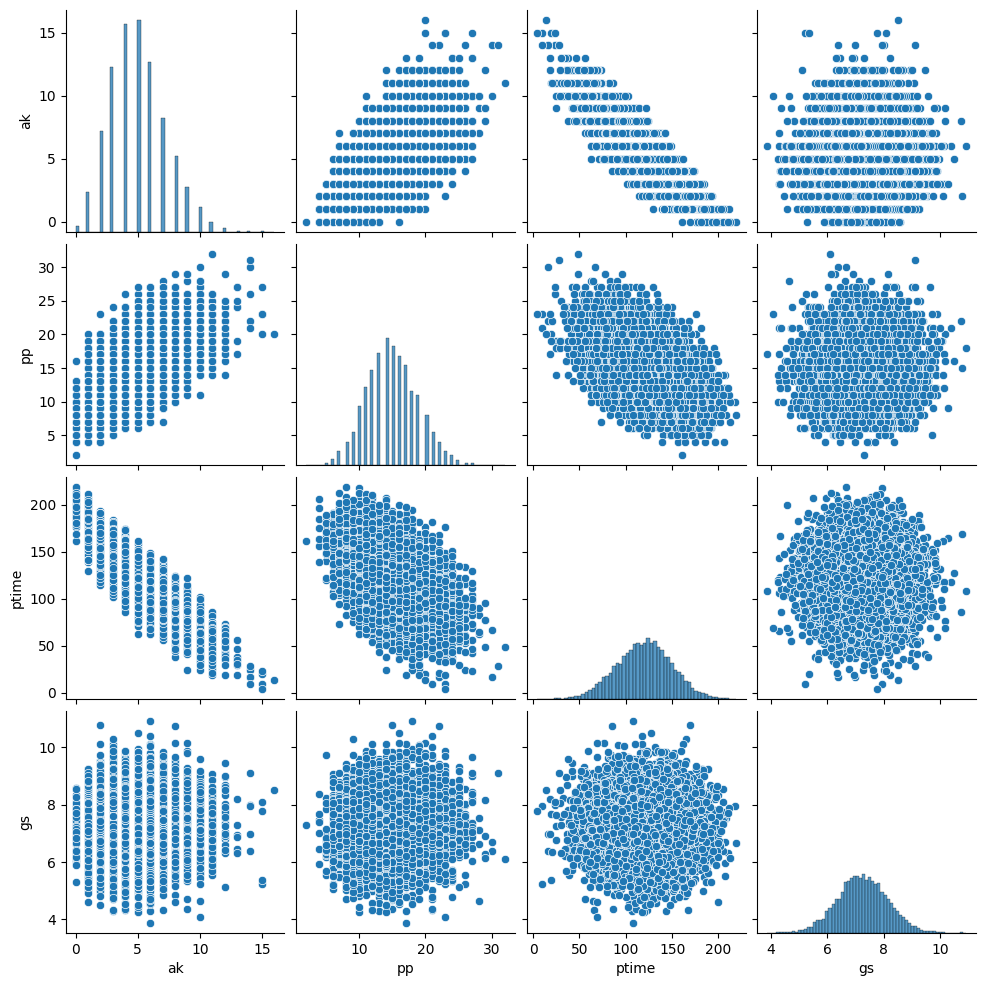

In [18]:
# Create a DataFrame with the variables
data = pd.DataFrame({'ak': pd_ak, 'pp': pd_pp, 'ptime': nd_pt, 'gs': gs})

# Create a scatterplot matrix using seaborn
sns.pairplot(data)
plt.show()

# **Problem 2 (20 points)**

You now pretend that the $n$ = 4 dimensional data you generated in Problem 1 arrive sequentially one at a time (the co-called **online** learning setting). Introduce the index $i$ to represent the ith arriving data sample $x_{i}$.

1. Write the expression of the *sample* correlation matrix (5 points)

2. Write the expression of the sample correlation matrix that can be estimated recursively and plot the elements of the sample correlation matrix from $i = 1$ to $i = 100$ (15 points)

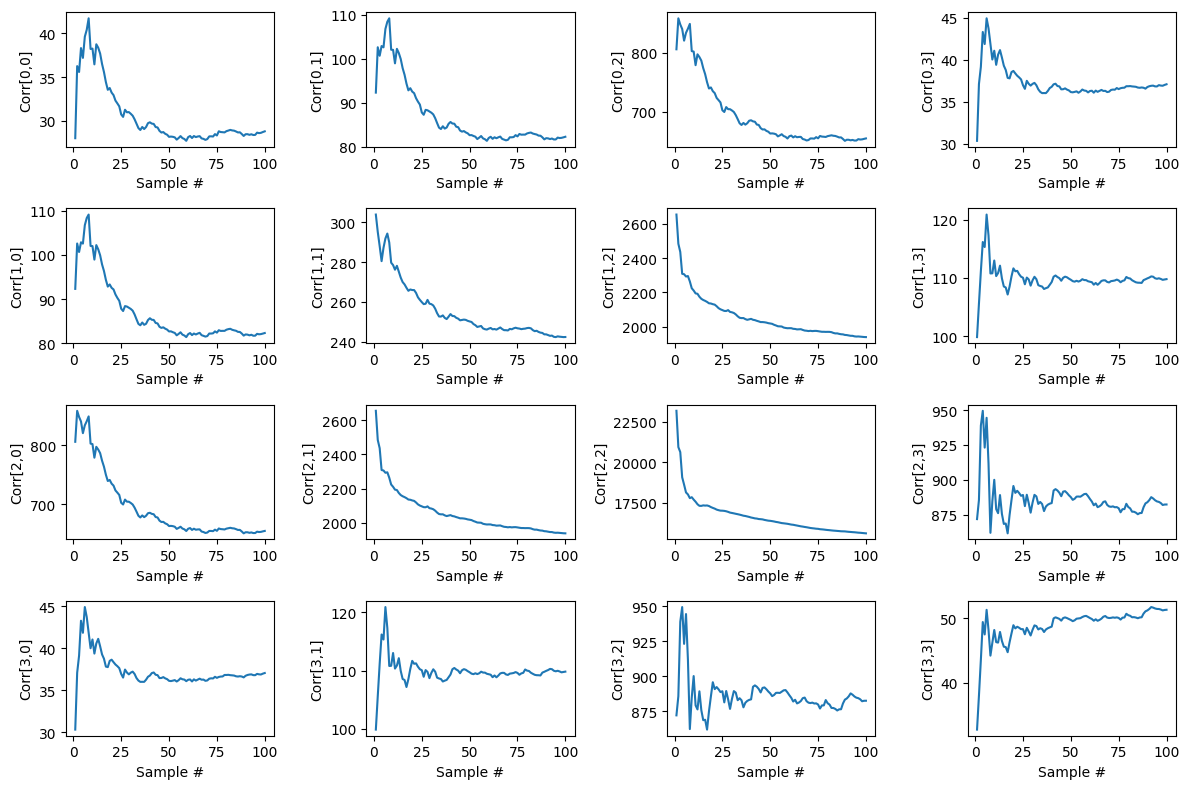

In [29]:
dimensions = 4

corr_matrix = np.identity(dimensions)  # Assuming a multi-dimensional dataset
num_samples = 100                      # Number of samples to consider
mean = np.zeros(dimensions)            # Multi-dimensional mean
corr_elements = []                     # Lists to store the elements of the correlation matrix over time

for i in range(1, num_samples + 1):
    # Calculate the updated correlation matrix element-wise
    diff = np.random.multivariate_normal(mean, cov_matrix, 1)[0] - np.mean(data.iloc[:i], axis=0)
    corr_matrix = ((i - 1) / i) * corr_matrix + (1 / i) * np.outer(diff, diff)

    # Append the elements of the sample correlation matrix to the list
    corr_elements.append(corr_matrix.copy())

# Plot the elements of the correlation matrix over time
corr_elements = np.array(corr_elements)
plt.figure(figsize=(12, 8))
for i in range(dimensions):
    for j in range(dimensions):
        plt.subplot(dimensions, dimensions, i * dimensions + j + 1)
        plt.plot(range(1, num_samples + 1), corr_elements[:, i, j])
        plt.xlabel("Sample #")
        plt.ylabel(f"Corr[{i},{j}]")
plt.tight_layout()
plt.show()